# Analysing pdb structures 
- [Importing dataframe](#Importing-dataframe)
    - [Space group statistics](#Space-group-statistics)
- [Size vs Volume](#Size-vs-Volume)
    - [$P_1$ space group](#$P_1$-space-group)
    - [ED data](#ED-data)
    

## Importing dataframe

In [20]:
from utils import *;imp.reload(dsp)
import make_pdb_pkl as pdbf;imp.reload(pdbf)
quick_info = lambda df :print(df[['sp','V','nb_atoms','nb_chains','ligands','res']])

df = pd.read_pickle(pdbf.pkl_file)

df = df.loc[df.V>10]
df = df.loc[df.res<3.0]
exp = df.exp.unique().astype(str)
exp_diff=[s for s in exp if 'DIFFRACTION' in s]+['ELECTRON CRYSTALLOGRAPHY']
df=df.loc[df.exp.isin(exp_diff)]
cols=pdbf.col_names
c_col='res'

below is computed : 
 - the density considering the multiplicity of the space group and multiply by the number of atom to get the number of atoms per unit cells. This ignores the ligands and occasional cases where atoms are unchanged by certain transforms. 
 - std : standard deviation of lattice parameters 

In [21]:
df['std'] = list(map(lambda x:x.std()/x.mean(),
    [np.array(eval(s)[:3]) for s in df.params],
    ))

In [ ]:
df['density']=df.nb_atoms*df.sp/df.V

In [28]:
quick_info(df)

              sp        V nb_atoms nb_chains      ligands   res
1EMU  P 21 21 21   154094     1337         2          GOL   1.9
8EM9        P 32   168080     2516         3               2.34
7EMV   P 43 21 2   325377     1629         1  GOL IMD WXP  1.45
5EMM     I 2 2 2  2563738     7660         2  5QL GOL SFG  2.37
4EM8    P 1 21 1   163181     2347         2               1.95
...          ...      ...      ...       ...          ...   ...
5U9N     F 2 2 2  2256593     2098         2      BMF SO4   2.4
7U9Y   P 21 21 2   287583     2722         1      BEN M4U   1.9
6U9L   P 41 21 2   429117     2063         1    GOL K SCN   1.7
1U9S    C 2 2 21  1235244     3372         1           BA   2.9
7U92   P 21 21 2   306699     2655         1       CL M0C   1.8

[165981 rows x 6 columns]


### Space group statistics

(None, <AxesSubplot:xlabel='space group', ylabel='count'>)

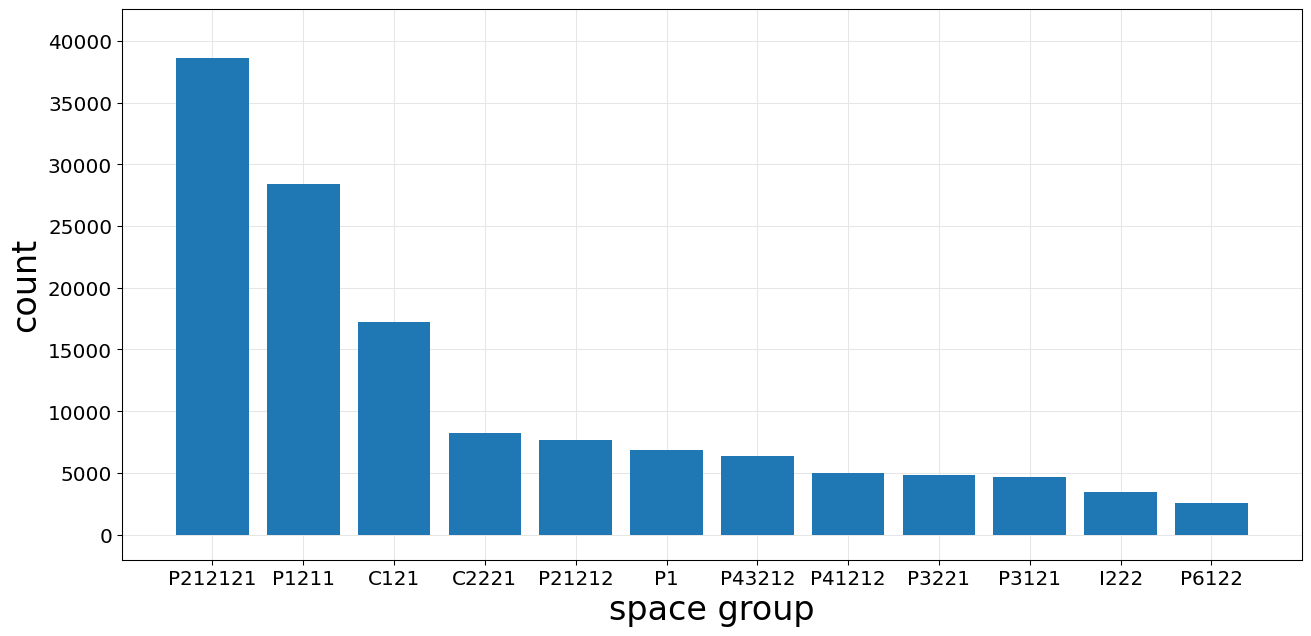

In [51]:
fig,ax=dsp.create_fig((15,7))
sp = df['sp'].value_counts()
sp = sp[:12]
plt.bar([s.replace(' ','') for s in sp.index],sp.values);
dsp.stddisp(ax=ax,labs=['space group','count'],fonts={'labs':15,'tick':15},opt='',
            xylims=['x',-1,len(sp)])

(None, <AxesSubplot:xlabel='nb atoms', ylabel='nb structures'>)

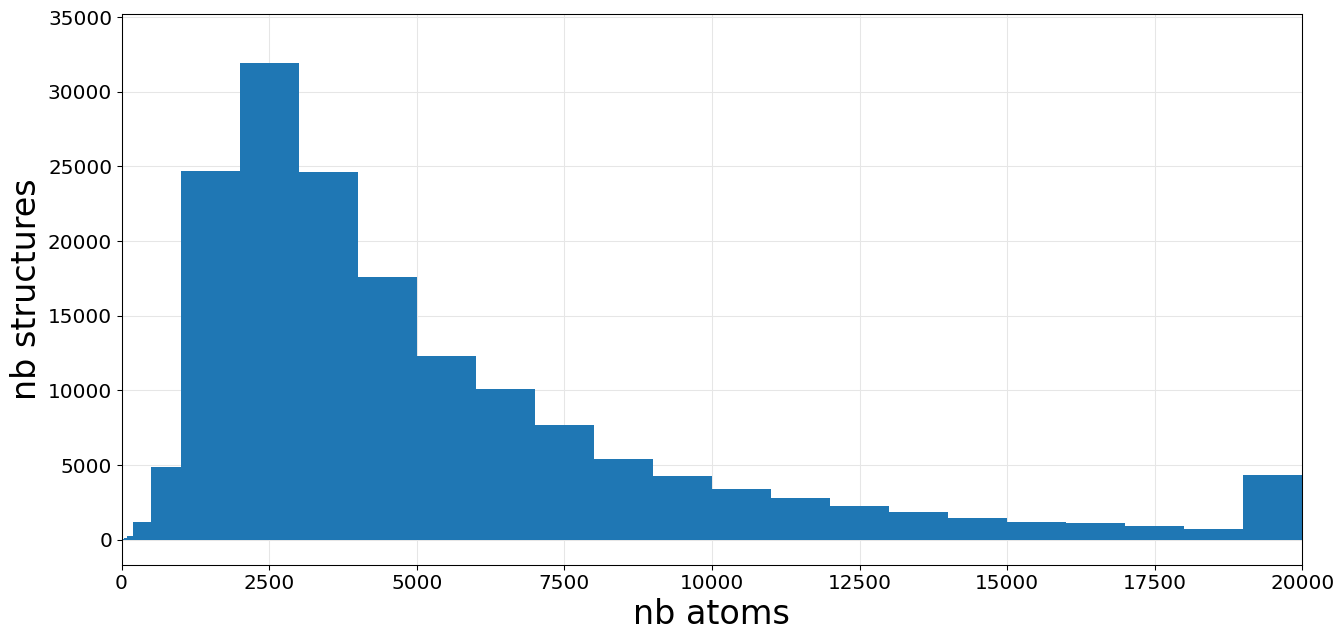

In [100]:
fig,ax=dsp.create_fig((15,7))
plt.hist(df['nb_atoms'],
         bins=[20,50,100,200,500]+list(range(1000,20000,1000))+list(np.arange(4,10)*1e4) )
dsp.stddisp(ax=ax,labs=['nb atoms','nb structures'],fonts={'labs':15,'tick':15},opt='',
            xylims=['x',0,2e4],
);

## Volume atomic density 
### $P_1$ space group

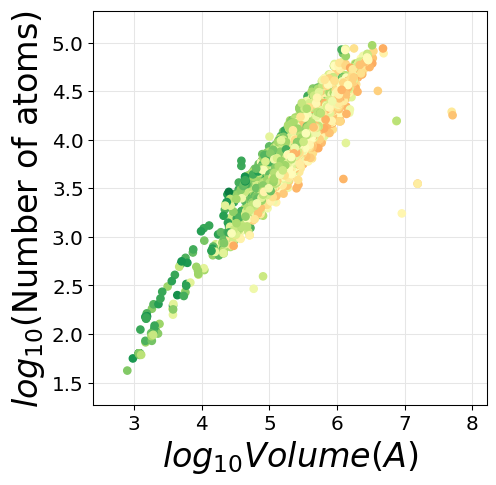

In [34]:
# dfv = dfv.loc[dfv.sp=='P 21 21 21']
df_1 = df.loc[df.sp=='P 1']
c_col ='res'

fig,ax=dsp.create_fig((5,5))
cs = ax.scatter(np.log10(df_1.V.astype(int)),np.log10(df_1.nb_atoms.astype(int)),
    s=30,c=df_1[c_col],cmap='RdYlGn_r',vmin=0.5,vmax=4)
fig,ax = dsp.stddisp(fig=fig,ax=ax,opt='',
    labs=['$log_{10} %s$' %cols['V'],'$log_{10}$(%s)' %cols['nb_atoms']]);

### ED data

In [30]:
df_e = df.loc[df.exp=='ELECTRON CRYSTALLOGRAPHY']
cols=pdbf.col_names
quick_info(df_e)

              sp       V nb_atoms nb_chains ligands   res
6PKN   P 43 21 2  477677     2100         1          2.08
6PKM   P 43 21 2  480991     2071         1          2.17
6PKO   P 43 21 2  476266     2056         1          2.07
6PKQ   P 43 21 2  483716     2129         1          1.85
6PKR   P 43 21 2  481929     2100         1          1.79
...          ...     ...      ...       ...     ...   ...
6M9J  P 1 21/c 1    2601       70         1           0.9
6M9I  P 21 21 21    2450       68         1           0.9
6CPV         I 4  413798     1494         2  MPD NA   2.5
8CPC   P 43 21 2  223228     1015         1          2.91
5KO0         P 1    3762      179         2     SCN   1.4

[169 rows x 6 columns]


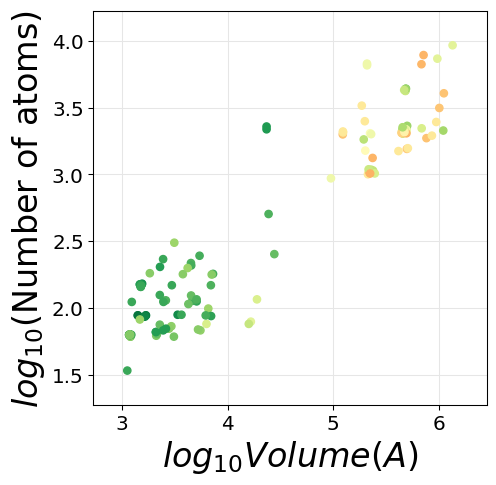

In [36]:
c_col='res'

fig,ax=dsp.create_fig((5,5))
cs = ax.scatter(np.log10(df_e.V.astype(int)),np.log10(df_e.nb_atoms.astype(int)),
    s=30,c=df_e[c_col],cmap='RdYlGn_r',vmin=0.5,vmax=4)
fig,ax = dsp.stddisp(fig=fig,ax=ax,opt='',
    labs=['$log_{10} %s$' %cols['V'],'$log_{10}$(%s)' %cols['nb_atoms']])#,imOpt='c')